# Assignment 6 Solution

This assignment is collaborated by **Jingting Dai** and **Hongjie Guan**. **Jingting finished A06.1 and Hongjie finished A06.2 and A06.3** 

## A06.1 Exponential Random Graph Models

Task: For the World Trade Web dataset, fit different ERGM-based Configuration Models and compare basic network metrics with null models

For each of the WTW networks provided:
+ measure the average clustering and reciprocity coefficients
+ fit the Undirected Binary CM and Directed Binary CM
+ sample 30 networks from the obtained distributions and measure clustering and reciprocity. Calculate average and standard error on each measure
+ plot clustering and reciprocity as functions of time, comparing the real value with the average and error bars from samples

In [1]:
import networkx as nx
import numpy as np
import os
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
def import_datasets(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        if 'graphml' in item:
            item_path = os.path.join(datasets_folder,item)
            item_name = item.split(".")[0].split("_",1)[1]
            print("dataset named "+item_name+" imported")
            d["{}".format(item_name)] = nx.read_graphml(item_path)
    print("finish importing")
    return d

In [3]:
graphs = import_datasets('data/World_Trade_Web')

dataset named 1992 imported
dataset named 1993 imported
dataset named 1994 imported
dataset named 1995 imported
dataset named 1996 imported
dataset named 1997 imported
dataset named 1998 imported
dataset named 1999 imported
dataset named 2000 imported
dataset named 2001 imported
dataset named 2002 imported
finish importing


Unweighted average clustering and reciprocity coefficient:

In [4]:
avg_clustring = {}
for name, graph in graphs.items():
    clustering = nx.average_clustering(graph)
    avg_clustring[name] = clustering
avg_clustring

{'1992': 0.8021364732946835,
 '1993': 0.7826552252417198,
 '1994': 0.778118724128831,
 '1995': 0.769316598518603,
 '1996': 0.779859983253989,
 '1997': 0.7844618494148852,
 '1998': 0.7913458153848136,
 '1999': 0.7946922756897296,
 '2000': 0.7928732278480053,
 '2001': 0.8020845961993215,
 '2002': 0.7955013137787762}

In [5]:
reciprocity = {}
for name, graph in graphs.items():
    recip = nx.reciprocity(graph)
    reciprocity[name] = recip
reciprocity

{'1992': 0.367340010185028,
 '1993': 0.430931744312026,
 '1994': 0.541138903672166,
 '1995': 0.6043664931031333,
 '1996': 0.6482433229421182,
 '1997': 0.6822429906542056,
 '1998': 0.7015887290167866,
 '1999': 0.716582186821144,
 '2000': 0.7232351897836112,
 '2001': 0.7375525101577026,
 '2002': 0.7041909280425562}

+ UBCM

In [6]:
#numpy adjacency matrix
un_adj_wtw = {}
for name, graph in graphs.items():
    adj = nx.to_numpy_array(graph.to_undirected())
    un_adj_wtw[name] = adj

In [7]:
#NEMtropy UndirectedGraph object
undirected = {}
for name, adj in un_adj_wtw.items():
    graph = UndirectedGraph(adj)
    undirected[name] = graph

In [8]:
cluster = {}
for name, graph in undirected.items():
    graph.solve_tool(model="cm_exp", max_steps=10000)
    graph.ensemble_sampler(30, cpu_n=1, output_dir=f"undirected_sample_{name}/")
    clust = []
    for i in range(30):
        edgelist_ens = np.loadtxt(f"undirected_sample_{name}/{i}.txt")
        net = nx.Graph()
        net.add_edges_from(edgelist_ens)
        clust.append(nx.average_clustering(net))
    cluster[name] = clust


solution error = 4.142009402130498e-09

solution error = 4.8082142711791676e-09

solution error = 4.112479246032308e-09

solution error = 1.4745751286682207e-09

solution error = 1.8382024791208096e-09

solution error = 1.1819167866633506e-09

solution error = 2.604906512715388e-09

solution error = 1.045179942593677e-09

solution error = 2.4500081963196862e-09

solution error = 4.760323690788937e-09

solution error = 3.76297748516663e-09


In [9]:
ubcm_avg_cluster = {}
ubcm_std = {}
for name, clust in cluster.items():
    avg_cluster = np.average(clust)
    std = np.std(clust)
    ubcm_avg_cluster[name] = avg_cluster
    ubcm_std[name] = std

In [10]:
def plot_avg_clustering(cluster_dict, std_dict, method):
    N = sorted(cluster_dict.keys())
    c = [cluster_dict[i] for i in N]
    errorbar = [std_dict[i] for i in N]
    plt.errorbar(N, c, yerr = errorbar,label="average clustering with 68% confidence interval")
    plt.errorbar(sorted(avg_clustring.keys()),[avg_clustring[i] for i in sorted(avg_clustring.keys())],label = "real average clustering")
    plt.xlabel('time')
    plt.ylabel('average clustering')
    plt.legend(loc='best')
    plt.title("{} average clustering".format(method))
    plt.show()

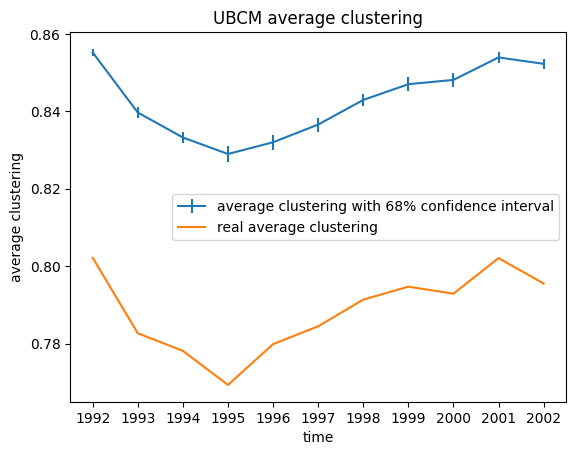

In [11]:
plot_avg_clustering(ubcm_avg_cluster, ubcm_std, "UBCM")

+ Directed

In [12]:
#numpy adjacency matrix
di_adj_wtw = {}
for name, graph in graphs.items():
    di_adj = nx.to_numpy_array(graph)
    di_adj_wtw[name] = di_adj

In [13]:
#NEMtropy DirectedGraph object
directed = {}
for name, adj in di_adj_wtw.items():
    graph = DirectedGraph(adj)
    directed[name] = graph

In [14]:
di_cluster = {}
di_reciprocity = {}
for name, graph in directed.items():
    graph.solve_tool(model="dcm_exp", max_steps=10000)
    graph.ensemble_sampler(30, cpu_n=1, output_dir=f"directed_sample_{name}/")
    di_clust = []
    di_reci = []
    for i in range(30):
        edgelist_ens = np.loadtxt(f"directed_sample_{name}/{i}.txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                                is_directed = True,
                                                is_sparse = False,
                                                is_weighted = False)
        G = nx.from_numpy_array(ens_adj,create_using=nx.DiGraph)
        di_clust.append(nx.average_clustering(G))
        di_reci.append(nx.reciprocity(G))
    di_cluster[name] = di_clust
    di_reciprocity[name] = di_reci


solution error = 1.8837624793377472e-09

solution error = 5.534275260288268e-09

solution error = 4.368011730093713e-09

solution error = 3.4401352877466707e-09

solution error = 2.9845139692952216e-09

solution error = 5.081744802737376e-09

solution error = 4.638096129383484e-09

solution error = 3.406455562071642e-09

solution error = 3.3826559331373574e-09

solution error = 3.814278670688509e-09

solution error = 4.403162279231765e-09


In [15]:
dbcm_avg_cluster = {}
dbcm_std = {}
dbcm_avg_reciprocity = {}
dbcm_reci_std = {}
for name, clust in di_cluster.items():
    avg_cluster = np.average(clust)
    std = np.std(clust)
    dbcm_avg_cluster[name] = avg_cluster
    dbcm_std[name] = std
for name, reci in di_reciprocity.items():
    avg_reci = np.average(reci)
    std = np.std(reci)
    dbcm_avg_reciprocity[name] = avg_reci
    dbcm_reci_std[name] = std

In [16]:
def plot_avg_reciprocity(reci_dict, reci_std_dict, method):
    N = sorted(reci_dict.keys())
    c = [reci_dict[i] for i in N]
    errorbar = [reci_std_dict[i] for i in N]
    plt.errorbar(N, c, yerr = errorbar,label="average reciprocity with 68% confidence interval")
    plt.errorbar(sorted(reciprocity.keys()),[reciprocity[i] for i in sorted(reciprocity.keys())],label = "real reciprocity")
    plt.xlabel('time')
    plt.ylabel('reciprocity coefficient')
    plt.legend(loc='best')
    plt.title("{} reciprocity coefficient".format(method))
    plt.show()

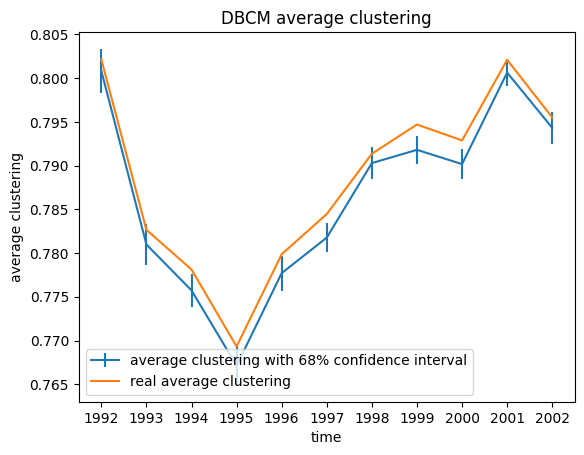

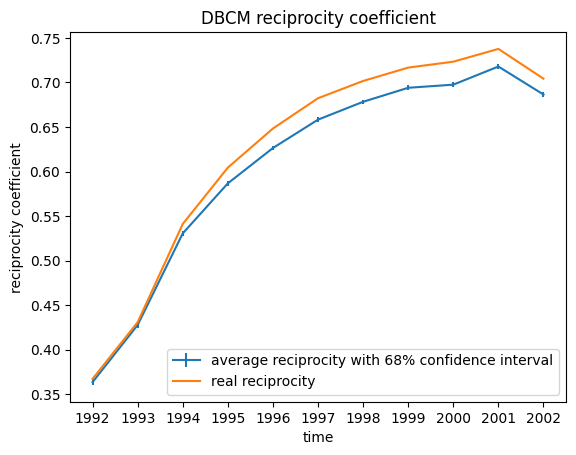

In [17]:
plot_avg_clustering(dbcm_avg_cluster, dbcm_std, "DBCM")
plot_avg_reciprocity(dbcm_avg_reciprocity, dbcm_reci_std, "DBCM")

## A06.2 - Weighted ERGMs

Task: Repeat the analysis of point 1 with weighted networks

+ measure strength assortativity coefficient on the data
+ fit the Undirected Enhanced CM and Directed Enhanced CM using the CReMa method
+ sample 30 networks from the obtained distributions and measure strength assortativity. Calculate average and std dev
+ plot strength assortativity as a function of time, comparing the real value with the average and error bars from samples
+ DECM: plot all pairs of assortativity (in-in, in-out, out-out)

### measure strength assortativity coefficient on the data

In [18]:
graphs

{'1992': <networkx.classes.digraph.DiGraph at 0x25b469a86a0>,
 '1993': <networkx.classes.digraph.DiGraph at 0x25b67316fd0>,
 '1994': <networkx.classes.digraph.DiGraph at 0x25b469a4910>,
 '1995': <networkx.classes.digraph.DiGraph at 0x25b469a8250>,
 '1996': <networkx.classes.digraph.DiGraph at 0x25b66ebff40>,
 '1997': <networkx.classes.digraph.DiGraph at 0x25b668d2dc0>,
 '1998': <networkx.classes.digraph.DiGraph at 0x25b56390ac0>,
 '1999': <networkx.classes.digraph.DiGraph at 0x25b469a8a90>,
 '2000': <networkx.classes.digraph.DiGraph at 0x25b66eda370>,
 '2001': <networkx.classes.digraph.DiGraph at 0x25b66edadf0>,
 '2002': <networkx.classes.digraph.DiGraph at 0x25b469a8190>}

In [19]:
strength_assortativity_coefficient = {}
for name, graph in graphs.items():
    assortativity = nx.degree_assortativity_coefficient(graph,weight='weight')
    strength_assortativity_coefficient[name] = assortativity
strength_assortativity_coefficient

{'1992': -0.059869793086991994,
 '1993': -0.0720206887295781,
 '1994': -0.0802250161794803,
 '1995': -0.07830645801950645,
 '1996': -0.07535502512416278,
 '1997': -0.07171683897072441,
 '1998': -0.06572057397949525,
 '1999': -0.06546711179930259,
 '2000': -0.06539073425903175,
 '2001': -0.06192625961852569,
 '2002': -0.06303814946654615}

+ UECM

In [57]:
strenth_assortativity_generated_UECM = {}

for year,G in graphs.items():
    adj = nx.to_numpy_array(G.to_undirected())
    graph =  UndirectedGraph(adj)
    graph.solve_tool(model="crema",
                 method="newton",
                 initial_guess="random",
                 adjacency="cm_exp",
                 method_adjacency="newton")
    graph.ensemble_sampler(30, cpu_n=1, output_dir=f'undirected_weight_{year}/')
    sac_list = []
    for i in range(30):
        edgelist_ens = np.loadtxt(f"undirected_sample_{year}/{i}.txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                        is_directed = False,
                                        is_sparse = False,
                                        is_weighted = True)
        g = nx.from_numpy_array(ens_adj)
        sac = nx.degree_pearson_correlation_coefficient(g,weight='weight')
        sac_list.append(sac)
    strenth_assortativity_generated_UECM[year]=sac_list
    


solution error = 239180676849.6311

solution error = 391286824206.114

solution error = 426640496340.6242

solution error = 388552988793.3101

solution error = 482089642807.9469

solution error = 3705643518289.43

solution error = 512231249750.3647

solution error = 547643958163.1188

solution error = 509664018322.4537

solution error = 510128437467.3625

solution error = 506993591356.55585


In [58]:
UECM_avg_sac={}
UECM_std_sac={}
for year,sac in strenth_assortativity_generated_UECM.items():
    avg_sac = np.mean(sac)
    std_sac = np.std(sac)
    UECM_avg_sac[year]=avg_sac
    UECM_std_sac[year]=std_sac

In [59]:
UECM_avg_sac

{'1992': -0.3231279218857778,
 '1993': -0.27902939912177543,
 '1994': -0.20676596745819048,
 '1995': -0.13877287333272992,
 '1996': -0.1226846965758674,
 '1997': -0.09722513337372778,
 '1998': -0.08913999349433878,
 '1999': -0.09467701078365189,
 '2000': -0.08061291106193562,
 '2001': -0.07473330408065232,
 '2002': -0.08117607054130145}

In [60]:
UECM_std_sac

{'1992': 0.005098789628084211,
 '1993': 0.003811831872058528,
 '1994': 0.0036315351377829374,
 '1995': 0.005099595153832829,
 '1996': 0.0049853131663484705,
 '1997': 0.018065307509057892,
 '1998': 0.0033417066288602094,
 '1999': 0.002906572286888222,
 '2000': 0.0036561165043226674,
 '2001': 0.004149442326282265,
 '2002': 0.0038358593670846917}

+ DECM

In [61]:
DECM_avg_sac_ii={}
DECM_avg_sac_io={}
DECM_avg_sac_oo={}

DECM_std_sac_ii={}
DECM_std_sac_io={}
DECM_std_sac_oo={}

for year,G in graphs.items():
    adj = nx.to_numpy_array(G)
    graph =  UndirectedGraph(adj)
    graph.solve_tool(model="crema",
                 method="newton",
                 initial_guess="random",
                 adjacency="cm_exp",
                 method_adjacency="newton")
    graph.ensemble_sampler(30, cpu_n=1, output_dir=f'directed_weight_{year}/')
    sac_list_ii = []
    sac_list_io = []
    sac_list_oo = []
    for i in range(30):
        edgelist_ens = np.loadtxt(f"directed_sample_{year}/{i}.txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                        is_directed = True,
                                        is_sparse = False,
                                        is_weighted = True)
        g = nx.from_numpy_array(ens_adj)
        sac_list_ii.append(nx.degree_pearson_correlation_coefficient(g,x='in',y='in',weight='weight'))
        sac_list_io.append(nx.degree_pearson_correlation_coefficient(g,x='in',y='out',weight='weight'))
        sac_list_oo.append(nx.degree_pearson_correlation_coefficient(g,x='out',y='out',weight='weight'))
    

    DECM_avg_sac_ii[year]= np.mean(sac_list_ii)
    DECM_avg_sac_io[year]= np.mean(sac_list_io)
    DECM_avg_sac_oo[year]= np.mean(sac_list_oo)

    DECM_std_sac_ii[year]= np.std(sac_list_ii)
    DECM_std_sac_io[year]= np.std(sac_list_io)
    DECM_std_sac_oo[year]= np.std(sac_list_oo)




solution error = 224331921676.26797

solution error = 319667610833.9104

solution error = 389492389140.66675

solution error = 451076081872.93195

solution error = 465758744238.3207

solution error = 494497054551.2842

solution error = 4219814239297.657

solution error = 476306015667.6791

solution error = 493938375885.2029

solution error = 498405018299.9799

solution error = 467307556134.83124


In [62]:
DECM_avg_sac_ii

{'1992': -0.5227488764653098,
 '1993': -0.43128792916432557,
 '1994': -0.35336987850926366,
 '1995': -0.2784427826333603,
 '1996': -0.2549077187470792,
 '1997': -0.21834311975991177,
 '1998': -0.2004382309623441,
 '1999': -0.18286477180961316,
 '2000': -0.1791726117272367,
 '2001': -0.17260863156900383,
 '2002': -0.18271808593088462}

In [63]:
DECM_avg_sac_io

{'1992': -0.5227488764653098,
 '1993': -0.43128792916432557,
 '1994': -0.35336987850926366,
 '1995': -0.2784427826333603,
 '1996': -0.2549077187470792,
 '1997': -0.21834311975991177,
 '1998': -0.2004382309623441,
 '1999': -0.18286477180961316,
 '2000': -0.1791726117272367,
 '2001': -0.17260863156900383,
 '2002': -0.18271808593088462}

In [64]:
DECM_avg_sac_oo

{'1992': -0.5227488764653098,
 '1993': -0.43128792916432557,
 '1994': -0.35336987850926366,
 '1995': -0.2784427826333603,
 '1996': -0.2549077187470792,
 '1997': -0.21834311975991177,
 '1998': -0.2004382309623441,
 '1999': -0.18286477180961316,
 '2000': -0.1791726117272367,
 '2001': -0.17260863156900383,
 '2002': -0.18271808593088462}

In [69]:
DECM_std_sac_ii

{'1992': 0.0028271456051060227,
 '1993': 0.07848661418506891,
 '1994': 0.003491737049680292,
 '1995': 0.0037388060886684184,
 '1996': 0.003971076301542546,
 '1997': 0.003758408991412613,
 '1998': 0.0046327316349034095,
 '1999': 0.0336658244288106,
 '2000': 0.006500383863191137,
 '2001': 0.004553679752067724,
 '2002': 0.010955792110984557}

In [70]:
 DECM_std_sac_io

{'1992': 0.0028271456051060227,
 '1993': 0.07848661418506891,
 '1994': 0.003491737049680292,
 '1995': 0.0037388060886684184,
 '1996': 0.003971076301542546,
 '1997': 0.003758408991412613,
 '1998': 0.0046327316349034095,
 '1999': 0.0336658244288106,
 '2000': 0.006500383863191137,
 '2001': 0.004553679752067724,
 '2002': 0.010955792110984557}

In [71]:
 DECM_std_sac_oo

{'1992': 0.0028271456051060227,
 '1993': 0.07848661418506891,
 '1994': 0.003491737049680292,
 '1995': 0.0037388060886684184,
 '1996': 0.003971076301542546,
 '1997': 0.003758408991412613,
 '1998': 0.0046327316349034095,
 '1999': 0.0336658244288106,
 '2000': 0.006500383863191137,
 '2001': 0.004553679752067724,
 '2002': 0.010955792110984557}

In [65]:
def plot_UECM_strength_assortativity(real_values,avg_dict, std_dict):
    year = sorted(real_values.keys())
    avg = [avg_dict[i] for i in year]
    errorbar = [std_dict[i] for i in year]
    plt.errorbar(year, avg, yerr = errorbar,color='red',label="average strength assortativity with 68% confidence interval")
    plt.errorbar(year,[real_values[i] for i in year],color='blue',label = "real strength assortativity")
    plt.xlabel('time')
    plt.ylabel('strength assortativity coefficient')
    plt.legend(loc='best')
    plt.title("UECM strength assortativity coefficient")
    plt.show()

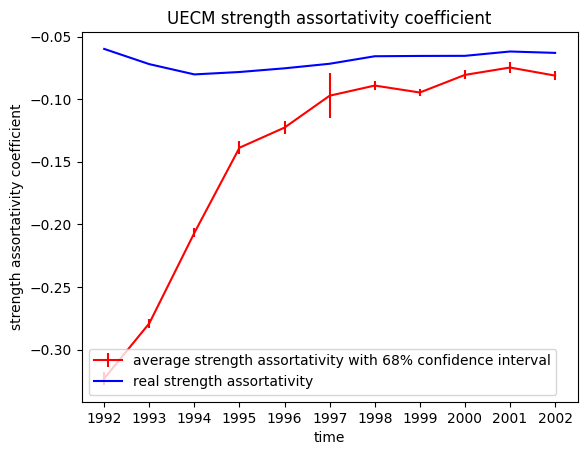

In [66]:
plot_UECM_strength_assortativity(strength_assortativity_coefficient, UECM_avg_sac, UECM_std_sac)

In [67]:
def plot_DECM_strength_assortativity(real_values,avg_dict_ii,avg_dict_io,avg_dict_oo, std_dict_ii,std_dict_io,std_dict_oo):
    year = sorted(real_values.keys())
    avg_ii = [avg_dict_ii[i] for i in year]
    avg_io = [avg_dict_io[i] for i in year]
    avg_oo = [avg_dict_oo[i] for i in year]
    errorbar_ii = [std_dict_ii[i] for i in year]
    errorbar_io = [std_dict_io[i] for i in year]
    errorbar_oo = [std_dict_oo[i] for i in year]
    plt.errorbar(year, avg_ii, yerr = errorbar_ii,color='red',label="average ii strength assortativity with 68% confidence interval")
    plt.errorbar(year, avg_io, yerr = errorbar_io,color='orange',label="average io strength assortativity with 68% confidence interval")
    plt.errorbar(year, avg_oo, yerr = errorbar_oo,color='yellow',label="average oo strength assortativity with 68% confidence interval")
    plt.errorbar(year,[real_values[i] for i in year],color='blue',label = "real strength assortativity")
    plt.xlabel('time')
    plt.ylabel('strength assortativity coefficient')
    plt.legend(loc='best')
    plt.title("DECM strength assortativity coefficient")
    plt.show()

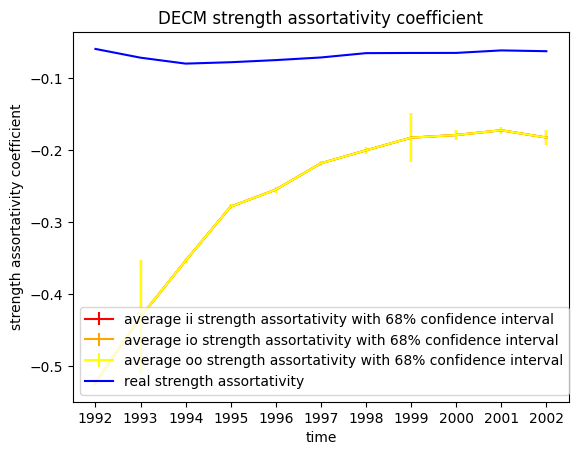

In [72]:
plot_DECM_strength_assortativity(strength_assortativity_coefficient,DECM_avg_sac_ii,DECM_avg_sac_io,DECM_avg_sac_oo,DECM_std_sac_ii,DECM_std_sac_io,DECM_std_sac_oo)

## A06.3 - Drawing conclusions

Task: write a short paragraph to draw conclusions about the structure of the World Trade Web based on the ERGM inferential approach

You should include at least the following points:
+ Comment on the interpretation of the clustering and reciprocity coefficients found in the original data
+ Comment on the interpretation of strength assortativity for this dataset
+ Comment on the conclusions you can draw via the inference of the UBCM, DBCM and DECM models